In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) #Initializing weights 
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):

                net_input = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(net_input)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        net_input = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(net_input)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']
print(df[0:100])

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,1,2,3]].values

    Sepal_length  Sepal_width  Petal_length  Petal_width          Species
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


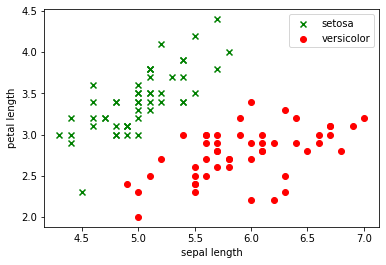

In [4]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)
print("True Values from the testing data:",y_test)
print("Predictions on the testing data:",predictions)
print("Perceptron classification accuracy", accuracy_score(y_test, predictions))

True Values from the testing data: [1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1]
Predictions on the testing data: [1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1]
Perceptron classification accuracy 1.0
